# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***


W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))




3.0 + 2.0 x + 1.0 x**2
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


Pierwiastki wielomianu z podanych pierwiastków: [ 1.          2.          3.          4.          5.          5.99999995
  7.00000031  7.99999881  9.00000314  9.99999413 11.00000767 11.99999318
 13.00000392 13.99999869 15.00000019]
Błąd bezwzględny dla każdego pierwiastka: [1.28563826e-13 5.21582777e-12 8.05213674e-11 2.50286902e-10
 4.38199876e-09 5.40008758e-08 3.14317981e-07 1.18822185e-06
 3.13984739e-06 5.86836073e-06 7.67035721e-06 6.82320351e-06
 3.92337369e-06 1.31241578e-06 1.93749571e-07]


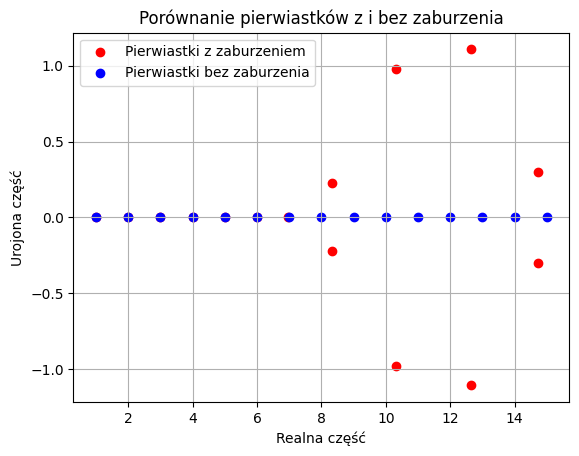

In [68]:
# Tworzenie wielomianu na podstawie listy pierwiastków {x_n = n, n = 1, 2, ..., 15}
roots_list = np.arange(1, 16)
poly_from_roots = Polynomial.fromroots(roots_list)

# Znajdowanie pierwiastków wielomianu utworzonego z podanych pierwiastków
roots_from_roots = poly_from_roots.roots()
print("Pierwiastki wielomianu z podanych pierwiastków:", roots_from_roots)

# Ocena dokładności otrzymanego wyniku
error = np.abs(roots_list - roots_from_roots)
print("Błąd bezwzględny dla każdego pierwiastka:", error)

# Dodanie małego zaburzenia do trzynastego elementu wektora współczynników
coefficients_from_roots_with_noise = poly_from_roots.coef.copy()
coefficients_from_roots_with_noise[13] += 1e-5

# Znajdowanie pierwiastków wielomianu z zaburzonymi współczynnikami
poly_from_roots_with_noise = Polynomial(coefficients_from_roots_with_noise)
roots_from_roots_with_noise = poly_from_roots_with_noise.roots()

# Wykres pierwiastków na płaszczyźnie zespolonej
plt.scatter(roots_from_roots_with_noise.real, roots_from_roots_with_noise.imag, color='red', label='Pierwiastki z zaburzeniem')
plt.scatter(roots_from_roots.real, roots_from_roots.imag, color='blue', label='Pierwiastki bez zaburzenia')
plt.xlabel('Realna część')
plt.ylabel('Urojona część')
plt.title('Porównanie pierwiastków z i bez zaburzenia')
plt.legend()
plt.grid(True)
plt.show()

***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

In [ ]:
# nie robimy

# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

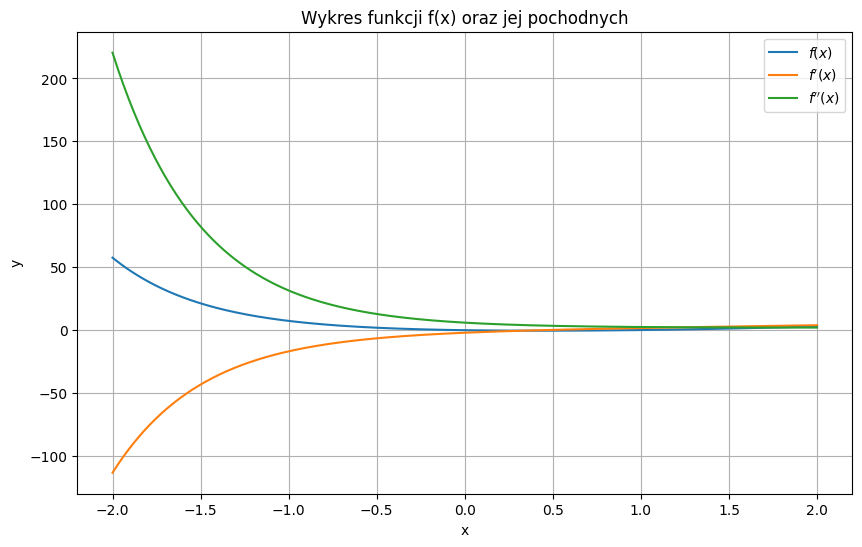

Pierwiastki równania f(x) = 0: [-1.  1.]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Definicja funkcji f(x)
def f(x):
    return np.exp(-2*x) + x**2 - 1

# Obliczenie pierwszej i drugiej pochodnej funkcji f(x)
def df(x):
    return -2*np.exp(-2*x) + 2*x

def d2f(x):
    return 4*np.exp(-2*x) + 2

# Zakres x dla wykresu
x_values = np.linspace(-2, 2, 400)

# Obliczenie wartości funkcji dla zakresu x
y_values = f(x_values)
y_prime_values = df(x_values)
y_double_prime_values = d2f(x_values)

# Stworzenie wykresu funkcji oraz jej pochodnych
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='$f(x)$')
plt.plot(x_values, y_prime_values, label="$f'(x)$")
plt.plot(x_values, y_double_prime_values, label="$f''(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres funkcji f(x) oraz jej pochodnych')
plt.legend()
plt.grid(True)
plt.show()

# Tworzenie wielomianu na podstawie funkcji f(x)
coefficients = [1, 0, -1]
poly = Polynomial(coefficients)

# Znalezienie pierwiastków wielomianu (pierwiastków funkcji f(x))
roots = poly.roots()
print("Pierwiastki równania f(x) = 0:", roots)


***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [62]:
import sympy as sp
import numpy as np

def secant_method(f, x0, x1, tol, max_iter):
    iterations = 0
    
    while iterations < max_iter:
        fx1 = f(x1)
        fx0 = f(x0)
        if abs(fx1 - fx0) < tol:
            break
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if x2 is None or abs(x2 - x1) < tol or abs(f(x2)) < tol:
            return x2, iterations
        x0 = x1
        x1 = x2
        iterations += 1
    
    return None, iterations



def newton_raphson_method(f, df, x0, tol, max_iter):
    iterations = 0
    
    while iterations < max_iter:
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < tol or abs(f(x1)) < tol:
            return x1, iterations
        x0 = x1
        iterations += 1
    
    return None, iterations

def bisection_method(f, a, b, tol, max_iter):
    iterations = 0
    
    while iterations < max_iter:
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, iterations
        iterations += 1
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return None, iterations

# Definicja funkcji f(x)
x = sp.Symbol('x')
f = x**3 - 6*x**2 + 11*x - 6

# Obliczanie pochodnej funkcji f(x)
df = sp.diff(f, x)

# Definicja przedziałów startowych
intervals = [(0, 1), (2, 3), (4, 5)]

# Dokładność
epsilon = 1e-6

# Maksymalna liczba iteracji
max_iter = 1000

# Wyniki dla każdej metody
results = {'bisection': [], 'newton_raphson': [], 'secant': []}

# Funkcje pomocnicze dla każdej metody
def f_func(x_val):
    return f.subs(x, x_val)

def df_func(x_val):
    return df.subs(x, x_val)

# Porównanie dla każdego przedziału startowego
for interval in intervals:
    a, b = interval
    
    # Metoda bisekcji
    root, iterations = bisection_method(f_func, a, b, epsilon, max_iter)
    results['bisection'].append(iterations)
    
    # Metoda Newtona-Raphsona
    root, iterations = newton_raphson_method(f_func, df_func, (a + b) / 2, epsilon, max_iter)
    results['newton_raphson'].append(iterations)
    
    # Metoda siecznych
    root, iterations = secant_method(f_func, a, b, epsilon, max_iter)
    results['secant'].append(iterations)

# Wyświetlanie wyników
for method, iterations in results.items():
    print(f"Metoda {method}: {iterations}")


Metoda bisection: [19, 19, 19]
Metoda newton_raphson: [4, 0, 5]
Metoda secant: [0, 0, 7]


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.

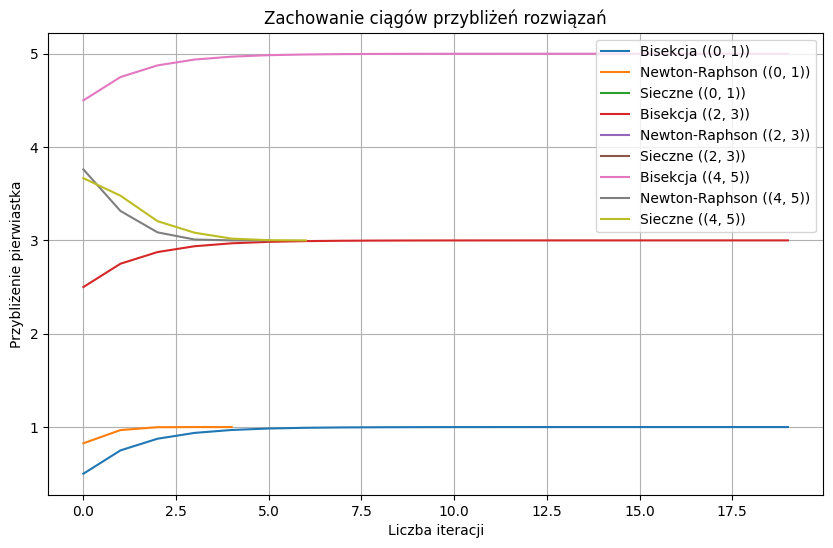

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def secant_method(f, x0, x1, tol, max_iter):
    iterations = 0
    approximations = []
    
    while iterations < max_iter:
        fx1 = f(x1)
        fx0 = f(x0)
        if abs(fx1 - fx0) < tol:
            break
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if x2 is None or abs(x2 - x1) < tol or abs(f(x2)) < tol:
            break
        x0 = x1
        x1 = x2
        iterations += 1
        approximations.append(x2)
    
    return approximations

def newton_raphson_method(f, df, x0, tol, max_iter):
    iterations = 0
    approximations = []
    
    while iterations < max_iter:
        x1 = x0 - f(x0) / df(x0)
        approximations.append(x1)
        if abs(x1 - x0) < tol or abs(f(x1)) < tol:
            break
        x0 = x1
        iterations += 1
    
    return approximations

def bisection_method(f, a, b, tol, max_iter):
    iterations = 0
    approximations = []
    
    while iterations < max_iter:
        c = (a + b) / 2
        approximations.append(c)
        if f(c) == 0 or (b - a) / 2 < tol:
            break
        iterations += 1
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return approximations

# Definicja funkcji f(x)
x = sp.Symbol('x')
f_expr = x**3 - 6*x**2 + 11*x - 6
f_func = sp.lambdify(x, f_expr)

# Obliczanie pochodnej funkcji f(x)
df_expr = sp.diff(f_expr, x)
df_func = sp.lambdify(x, df_expr)

# Definicja przedziałów startowych
intervals = [(0, 1), (2, 3), (4, 5)]

# Dokładność
epsilon = 1e-6

# Maksymalna liczba iteracji
max_iter = 100

# Generowanie wykresów dla każdej metody
plt.figure(figsize=(10, 6))

for interval in intervals:
    a, b = interval
    
    bisection_approximations = bisection_method(f_func, a, b, epsilon, max_iter)
    plt.plot(range(len(bisection_approximations)), bisection_approximations, label=f'Bisekcja ({interval})')

    newton_raphson_approximations = newton_raphson_method(f_func, df_func, (a + b) / 2, epsilon, max_iter)
    plt.plot(range(len(newton_raphson_approximations)), newton_raphson_approximations, label=f'Newton-Raphson ({interval})')

    secant_approximations = secant_method(f_func, a, b, epsilon, max_iter)
    plt.plot(range(len(secant_approximations)), secant_approximations, label=f'Sieczne ({interval})')

plt.xlabel('Liczba iteracji')
plt.ylabel('Przybliżenie pierwiastka')
plt.title('Zachowanie ciągów przybliżeń rozwiązań')
plt.legend()
plt.grid(True)
plt.show()
